## 1 Preamble

In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from tpot import TPOTClassifier

## Load data

In [2]:
data = pd.read_pickle('data_ready_for_ML.pkl')

In [3]:
data.describe()

,Number of household members living in the compound,Number of males over 65 years old,Number of females over 65 years old,Number of males 15-65,Number of females between 15 and 65 years old,Number of boys between 15 and 65 years old,Number of girls between 5 and 14 years old,Number of boys younger than 4 years old,Number of girls younger than 4 years old,Dependency ratio,...,3 meals/day: march,3 meals/day: april,3 meals/day: may,3 meals/day: june,3 meals/day: july,3 meals/day: august,3 meals/day: september,3 meals/day: october,3 meals/day: november,3 meals/day: december
count,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1349.000000,...,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000
mean,6.190476,0.133333,0.109158,1.734799,1.688645,0.979487,0.848352,0.354579,0.342125,1.011092,...,0.683370,0.674655,0.672476,0.662309,0.657952,0.661583,0.697168,0.708061,0.712418,0.724038
std,3.002501,0.369010,0.351719,1.221747,1.148336,1.096323,1.055501,0.671139,0.656139,1.011952,...,0.465331,0.468674,0.469481,0.473094,0.474568,0.473343,0.459650,0.454820,0.452799,0.447160
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.750000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.000000,5.000000,5.000000,8.000000,9.000000,6.000000,6.000000,5.000000,5.000000,13.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Fill in missing values

In [4]:
for this_column in list(data.columns):

    if (str(data[this_column].dtype) == 'category') | (str(data[this_column].dtype) == 'object') :
        fill_value = data[this_column].mode()

    else:
        fill_value = data[this_column].median()
        
    data[this_column] = data[this_column].fillna(value = fill_value)

## Split the target and features

In [5]:
target = data['Living Income Achieved']
data.drop(['Living Income Achieved'], axis = 1, inplace = True)

## one-hot encode

In [6]:
data.shape

(1377, 608)

In [7]:
data.dtypes

Country                                               category
Region                                                category
Number of household members living in the compound     float64
Number of males over 65 years old                      float64
Number of females over 65 years old                    float64
                                                        ...   
3 meals/day: september                                 float64
3 meals/day: october                                   float64
3 meals/day: november                                  float64
3 meals/day: december                                  float64
Analytical Group                                        object
Length: 608, dtype: object

In [8]:
data = pd.get_dummies(data)

In [9]:
data.shape

(1377, 838)

In [10]:
list(data.columns)

['Number of household members living in the compound',
 'Number of males over 65 years old',
 'Number of females over 65 years old',
 'Number of males 15-65',
 'Number of females between 15 and 65 years old',
 'Number of boys between 15 and 65 years old',
 'Number of girls  between 5 and 14 years old',
 'Number of boys younger than 4 years old',
 'Number of girls younger than 4 years old',
 'Dependency ratio',
 'Head: age',
 'Female head',
 'All household boys ages 5 to 14 currently attending school',
 'All household girls ages 5 to 14 currently attending school',
 'Estimated income percentage from sale of cocoa',
 'Estimated income percentage from sale of other crops',
 'Estimated income percentage from sale of livestock or livestock products',
 'Estimated income percentage from sale of fish',
 'Estimated income percentage from sale of bush products (bush meat, charcoal, woo',
 'Estimated income percentage from labouring for other people on their farms',
 'Estimated income percentage 

## Train test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    train_size=0.75, test_size=0.25,
                                                   random_state = 32)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1032 samples.
Testing set has 345 samples.


In [12]:
target.value_counts()/len(target)

False    0.851126
True     0.148874
Name: Living Income Achieved, dtype: float64

In [13]:
y_train.value_counts()/len(y_train)

False    0.844961
True     0.155039
Name: Living Income Achieved, dtype: float64

In [14]:
y_test.value_counts()/len(y_test)

False    0.869565
True     0.130435
Name: Living Income Achieved, dtype: float64

## Naive Predictor

In [15]:
TP = np.sum(target==0) # Counting the ones as this is the naive case. 
FP = target.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = (TP + TN)/(TP + TN + FP + FN)
recall = TP/(TP + FN)
precision = TP/(TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1+0.5**2)*(precision*recall)/((0.5**2)*precision+recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.8511, F-score: 0.8772]


## TPOT

In [16]:
pipeline_optimizer = TPOTClassifier()

In [18]:
pipeline_optimizer = TPOTClassifier(verbosity=2,
                                    # use_dask=True,
                                     n_jobs = -1,
                                    random_state = 32,
                                   periodic_checkpoint_folder = "intermediate_results",
                                   #max_time_mins = 1
                                   )

In [19]:
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
pipeline_optimizer.export('tpot_exported_pipeline.py')


Generation 1 - Current best internal CV score: 0.9408798836827541
Generation 2 - Current best internal CV score: 0.9437925050419773
Generation 3 - Current best internal CV score: 0.9437925050419773
Generation 4 - Current best internal CV score: 0.9437925050419773
Generation 5 - Current best internal CV score: 0.944744617982271
Generation 6 - Current best internal CV score: 0.9457295624032642
Generation 7 - Current best internal CV score: 0.949608367337367
Generation 8 - Current best internal CV score: 0.949608367337367
Generation 9 - Current best internal CV score: 0.949608367337367
Generation 10 - Current best internal CV score: 0.949608367337367
Generation 11 - Current best internal CV score: 0.949608367337367
Generation 12 - Current best internal CV score: 0.949608367337367
Generation 13 - Current best internal CV score: 0.949608367337367
Generation 14 - Current best internal CV score: 0.949608367337367
Generation 15 - Current best internal CV score: 0.9515313540640683
Generation 1

In [60]:
import pickle

In [80]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.preprocessing import FunctionTransformer
from copy import copy

TPOT_exported_pipeline = make_pipeline(
    make_union(
        make_union(
            FunctionTransformer(copy),
            make_union(
                FunctionTransformer(copy),
                FunctionTransformer(copy)
            )
        ),
        FunctionTransformer(copy)
    ),
    GradientBoostingClassifier(learning_rate=0.1, max_depth=7, max_features=1.0, min_samples_leaf=6, min_samples_split=9, n_estimators=100, subsample=0.9500000000000001)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(TPOT_exported_pipeline.steps, 'random_state', 32)

TPOT_exported_pipeline.fit(X_train, y_train)
TPOT_results = TPOT_exported_pipeline.predict(X_test)

In [81]:
pkl_filename = 'tpot_best_fitted.pkl'
pickle.dump(TPOT_exported_pipeline, open(pkl_filename, 'wb'))

In [82]:
print(TPOT_exported_pipeline.score(X_test, y_test))

0.9565217391304348


In [83]:
print(pipeline_optimizer.score(X_test, y_test))

0.9565217391304348


In [35]:
y_pred = pipeline_optimizer.predict(X_test)

In [36]:
#from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support

In [37]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.96116505, 0.91666667]),
 array([0.99      , 0.73333333]),
 array([0.97536946, 0.81481481]),
 array([300,  45], dtype=int64))

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[297,   3],
       [ 12,  33]], dtype=int64)

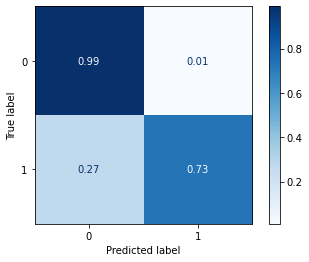

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize = 'true')

cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

## Previous approach

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train, predictions_train, beta = 0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#  Initialize the three models
clf_A = LogisticRegression(random_state=42)
clf_B = AdaBoostClassifier(random_state=42)
clf_C = KNeighborsClassifier()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(samples_100*0.1)
samples_1 = int(samples_100*0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    print("")
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)


LogisticRegression trained on 10 samples.
LogisticRegression trained on 103 samples.


C:\Users\marcelot\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\marcelot\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

LogisticRegression trained on 1032 samples.

AdaBoostClassifier trained on 10 samples.
AdaBoostClassifier trained on 103 samples.
AdaBoostClassifier trained on 1032 samples.

KNeighborsClassifier trained on 10 samples.
KNeighborsClassifier trained on 103 samples.
KNeighborsClassifier trained on 1032 samples.


D:\ND DS\2. Intro to Data Science\Project (Blog post)\visuals.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


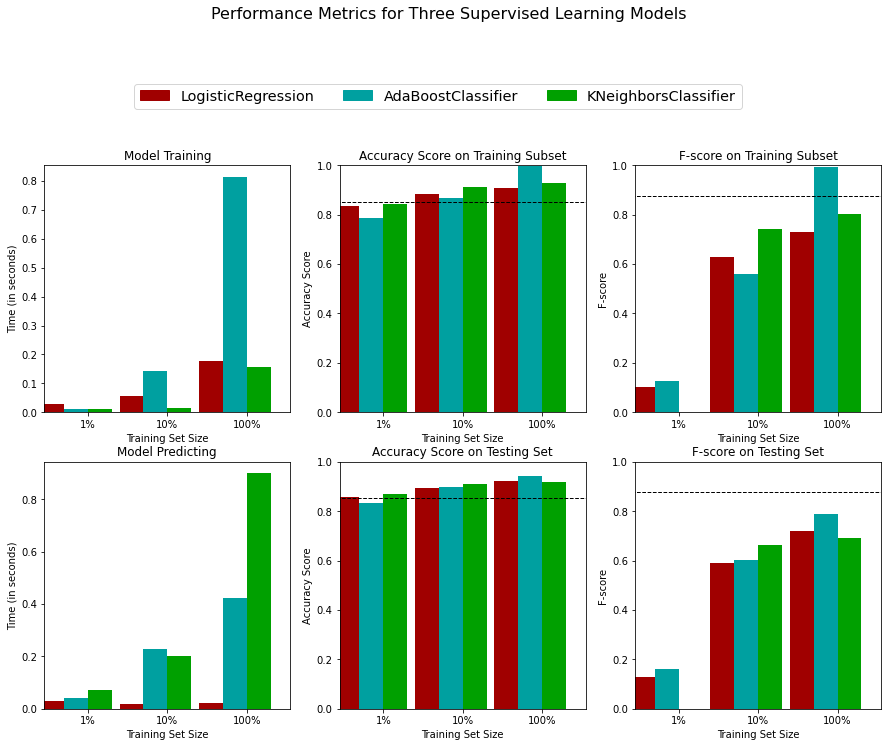

In [43]:
# Run metrics visualization for the three supervised learning models chosen
import visuals as vs
vs.evaluate(results, accuracy, fscore)

In [44]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators':[10, 50, 500, 1200, 1500],'learning_rate':[1.0,1.5,2.0]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta= 0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring = scorer, verbose=1, n_jobs = -1)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  9.5min finished


Unoptimized model
------
Accuracy score on testing data: 0.9420
F-score on testing data: 0.7895

Optimized Model
------
Final accuracy score on the testing data: 0.9420
Final F-score on the testing data: 0.7895


In [78]:
pkl_filename = 'ada_best.pkl'
pickle.dump(best_clf, open(pkl_filename, 'wb'))

In [45]:
precision_recall_fscore_support(y_test, best_predictions)

(array([0.96052632, 0.80487805]),
 array([0.97333333, 0.73333333]),
 array([0.96688742, 0.76744186]),
 array([300,  45], dtype=int64))

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, best_predictions)

array([[292,   8],
       [ 12,  33]], dtype=int64)

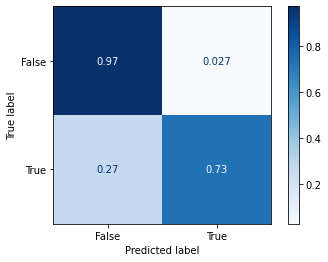

In [47]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(best_clf, 
                      X_test, y_test,
                      cmap=plt.cm.Blues,
                      normalize = 'true')

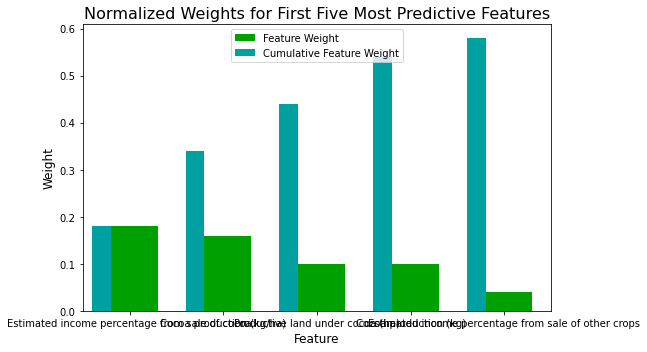

In [48]:
# TODO: Import a supervised learning model that has 'feature_importances_'
# Adaboost has feature importances

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = best_clf

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

In [49]:
pd.DataFrame({'col_name': model.feature_importances_}, index=data.columns).sort_values(by='col_name', ascending=False).head(n=20)

,col_name
Estimated income percentage from sale of cocoa,0.18
Cocoa production (kg/ha),0.16
Productive land under cocoa (ha),0.10
Cocoa production (kg),0.10
Cocoa land owned (ha),0.04
Estimated income percentage from sale of other crops,0.04
Land used to cultivate all crops (ha),0.02
Cocoa sold (share of total),0.02
Distance to the nearest tarred road (sealed road),0.02
Members per sleeping rooms,0.02


In [51]:
# Make sure it is stratified
from sklearn.model_selection import StratifiedShuffleSplit
cv_strat = StratifiedShuffleSplit(n_splits=5,
                                  test_size=0.2,
                                  random_state=42)

## Repeat previous part with the new CV
grid_obj_strat = GridSearchCV(clf, parameters, scoring = scorer, verbose=1,
                             cv = cv_strat, n_jobs = -1)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit_strat = grid_obj_strat.fit(X_train, y_train)

# Get the estimator
best_clf_strat = grid_fit_strat.best_estimator_

# Make predictions using the unoptimized and model
best_predictions_strat = best_clf_strat.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nOptimized Model with stratification\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions_strat)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions_strat, beta = 0.5)))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  3.3min finished


Unoptimized model
------
Accuracy score on testing data: 0.9420
F-score on testing data: 0.7895

Optimized Model
------
Final accuracy score on the testing data: 0.9420
Final F-score on the testing data: 0.7895

Optimized Model with stratification
------
Final accuracy score on the testing data: 0.9652
Final F-score on the testing data: 0.8667


In [79]:
pkl_filename = 'ada_best_strat.pkl'
pickle.dump(best_clf_strat, open(pkl_filename, 'wb'))

In [52]:
print(best_clf_strat)
print("Best score (Stratified):", grid_fit_strat.best_score_)
pd.concat([pd.DataFrame(grid_fit_strat.cv_results_["params"]),
           pd.DataFrame(grid_fit_strat.cv_results_["rank_test_score"],
                        columns=["Rank"]),
           pd.DataFrame(grid_fit_strat.cv_results_["mean_test_score"], 
                        columns=["F1 Score"])],axis=1)

AdaBoostClassifier(learning_rate=1.5, n_estimators=1500, random_state=42)
Best score (Stratified): 0.8607369737664989


,learning_rate,n_estimators,Rank,F1 Score
0,1.0,10,10,0.750027
1,1.0,50,2,0.859118
2,1.0,500,3,0.848211
3,1.0,1200,6,0.844772
4,1.0,1500,7,0.844740
5,1.5,10,9,0.761622
6,1.5,50,8,0.819073
7,1.5,500,5,0.846838
8,1.5,1200,4,0.848153
9,1.5,1500,1,0.860737


In [53]:
precision_recall_fscore_support(y_test, best_predictions_strat)

(array([0.98      , 0.86666667]),
 array([0.98      , 0.86666667]),
 array([0.98      , 0.86666667]),
 array([300,  45], dtype=int64))

In [55]:
confusion_matrix(y_test, best_predictions_strat)

array([[294,   6],
       [  6,  39]], dtype=int64)

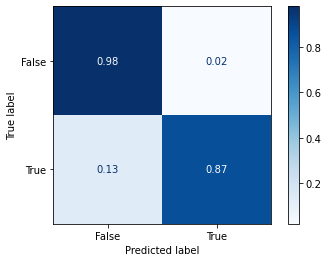

In [56]:
plot_confusion_matrix(best_clf_strat, 
                      X_test, y_test,
                      cmap=plt.cm.Blues,
                      normalize = 'true')

In [57]:
pd.DataFrame({'col_name': best_clf_strat.feature_importances_}, index=data.columns).sort_values(by='col_name', ascending=False).head(n=20)

,col_name
Estimated income percentage from sale of cocoa,0.092667
Cocoa production (kg/ha),0.090667
Cocoa production (kg),0.059333
Productive land under cocoa (ha),0.042000
Cocoa land owned (ha),0.029333
Hectares with trees between 5 and 25 years old,0.022000
Estimated income percentage from own small business or trading,0.021333
Head: age,0.020667
Estimated income percentage from sale of other crops,0.020000
Land used to cultivate all crops (ha),0.014667


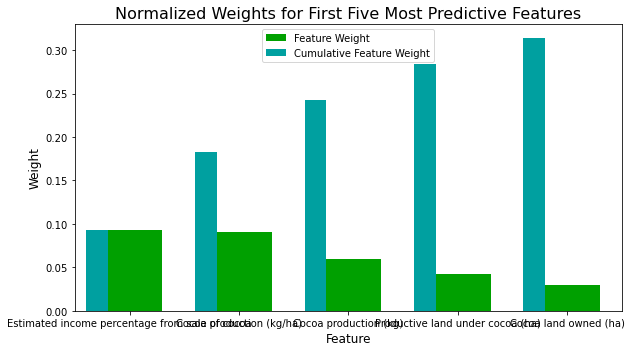

In [58]:
vs.feature_plot(best_clf_strat.feature_importances_, X_train, y_train)